In [1]:
%matplotlib inline

import cPickle as pickle
import lda
import matplotlib.pyplot as plt
import numpy as np
import os
from serial_lda_gibbs import LdaSampler
from multicore_lda_gibbs import MulticoreLdaSampler
import time

pickle_filepath = 'baseline_data.pickle'
None


Bad key "axes.spines.right" on line 210 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get

In [2]:
def load_reuters_dataset():
    if not os.path.exists(pickle_filepath):
        dump_reuters_dataset()
    with open(pickle_filepath, 'r') as rfile:
        X, vocab, titles = pickle.load(rfile)
    return X, vocab, titles

def dump_reuters_dataset():
    X = lda.datasets.load_reuters()
    vocab = lda.datasets.load_reuters_vocab()
    titles = lda.datasets.load_reuters_titles()

    with open(pickle_filepath, 'w') as wfile:
        pickle.dump( (X, vocab, titles), wfile)


In [3]:
def serial_gibbs(X, k, iters=50, log=True):
    sampler = LdaSampler(k)
    start = time.time()
    for it, phi in enumerate(sampler.run(X, maxiter=iters)):
        if log:
            print "Iteration", it
            print "Likelihood", sampler.loglikelihood()
        else:
            i = it
    end = time.time()
    print 'Completed %d iterations in %.3f seconds (serial)' % (iters, end - start)
    return sampler


def multicore_gibbs(X, k, p, iters=50, log=True):
    sampler = MulticoreLdaSampler(k, p)
    start = time.time()
    for it, phi in enumerate(sampler.run(X, maxiter=iters)):
        if log:
            print "Iteration", it
            print "Likelihood", sampler.loglikelihood()
        else:
            i = it
    end = time.time()
    print 'Completed %d iterations in %.3f seconds (P=%d)' % (iters, end - start, p)
    return sampler

In [4]:
#https://archive.ics.uci.edu/ml/datasets/Bag+of+Words
def load(dataset):
    files = {
        'nips': 'docword.nips.txt', 
        'nytimes': 'docwords.nytimes.txt',
    }
    if dataset == 'reuters':
        return load_reuters_dataset()
    elif dataset in files: 
        with open(files[dataset], 'r') as rfile:
            lines = rfile.readlines()
        n_documents = int(lines[0])
        n_words = int(lines[1])
        X = np.zeros((n_documents, n_words))
        data = map(lambda s: map(int, s.split()), lines[3:])
        for doc, word, count in data:
            X[doc-1][word-1] = count
        return X
    else:
        raise Exception ('Dataset %s not found' % dataset)


In [5]:
# data = load_reuters_dataset()[0]
# multicore_gibbs(data, 10, 4,iters=50, log=True)

Sampled in 2.403 seconds
Updated in 0.110 seconds
Iteration 0
Likelihood -866570.689767
Sampled in 2.364 seconds
Updated in 0.114 seconds
Iteration 1
Likelihood -844741.342502
Sampled in 2.330 seconds
Updated in 0.118 seconds
Iteration 2
Likelihood -823507.049741
Sampled in 2.352 seconds
Updated in 0.111 seconds
Iteration 3
Likelihood -803773.634455
Sampled in 2.613 seconds
Updated in 0.119 seconds
Iteration 4
Likelihood -783418.751877
Sampled in 2.531 seconds
Updated in 0.124 seconds
Iteration 5
Likelihood -764679.234567
Sampled in 2.473 seconds
Updated in 0.115 seconds
Iteration 6
Likelihood -748202.963475
Sampled in 2.522 seconds
Updated in 0.107 seconds
Iteration 7
Likelihood -734080.977105
Sampled in 2.541 seconds
Updated in 0.110 seconds
Iteration 8
Likelihood -724447.483327
Sampled in 2.687 seconds
Updated in 0.120 seconds
Iteration 9
Likelihood -715659.463298
Sampled in 2.431 seconds
Updated in 0.110 seconds
Iteration 10
Likelihood -709712.202835
Sampled in 2.462 seconds
Update

In [6]:
# serial_gibbs(load('nips'), 10, 16)
times = {}
likelihoods = {}
data = load_reuters_dataset()[0]#load('nips')
k = 20
iters = 10

sampler = serial_gibbs(data, k, iters=50, log=False)
times[0] = np.mean(sampler.sample_times)
likelihoods[0] = sampler.loglikelihood()
for p in [1,2,4,8,16]:
    sampler = multicore_gibbs(data, k, p,iters=50, log=False)
    times[p] = np.mean(sampler.sample_times) + np.mean(sampler.update_times)
    likelihoods[p] = sampler.loglikelihood()


Sampled in 2.998 seconds
Sampled in 3.019 seconds
Sampled in 2.923 seconds
Sampled in 2.997 seconds
Sampled in 2.950 seconds
Sampled in 2.949 seconds
Sampled in 2.926 seconds
Sampled in 2.913 seconds
Sampled in 2.891 seconds
Sampled in 2.931 seconds
Sampled in 2.989 seconds
Sampled in 3.024 seconds
Sampled in 3.015 seconds
Sampled in 3.284 seconds
Sampled in 3.285 seconds
Sampled in 3.304 seconds
Sampled in 3.371 seconds
Sampled in 3.105 seconds
Sampled in 3.212 seconds
Sampled in 3.274 seconds
Sampled in 2.996 seconds
Sampled in 2.974 seconds
Sampled in 3.022 seconds
Sampled in 2.992 seconds
Sampled in 3.033 seconds
Sampled in 3.022 seconds
Sampled in 3.181 seconds
Sampled in 3.235 seconds
Sampled in 3.010 seconds
Sampled in 3.265 seconds
Sampled in 3.123 seconds
Sampled in 3.036 seconds
Sampled in 3.251 seconds
Sampled in 3.333 seconds
Sampled in 3.048 seconds
Sampled in 3.217 seconds
Sampled in 3.212 seconds
Sampled in 3.261 seconds
Sampled in 3.367 seconds
Sampled in 3.120 seconds


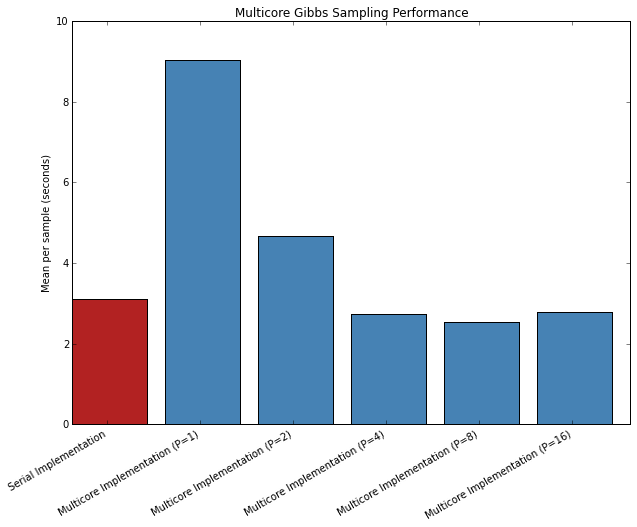

In [7]:
x, y = map(list, zip(*times.items()))
x[0] = 'Serial Implementation'
x[1:] = map(lambda p: 'Multicore Implementation (P=%d)' % p, x[1:])
y = map(abs, y)

fig = plt.figure()
width = .75
ind = np.arange(len(y))
plt.bar(ind[0], y[0], color='firebrick')
plt.bar(ind[1:], y[1:], color='steelblue')

plt.xticks(ind + width / 2, x)
plt.title('Multicore Gibbs Sampling Performance')
plt.ylabel('Mean per sample (seconds)')
fig.autofmt_xdate()
fig.set_size_inches(10, 8)

plt.show()

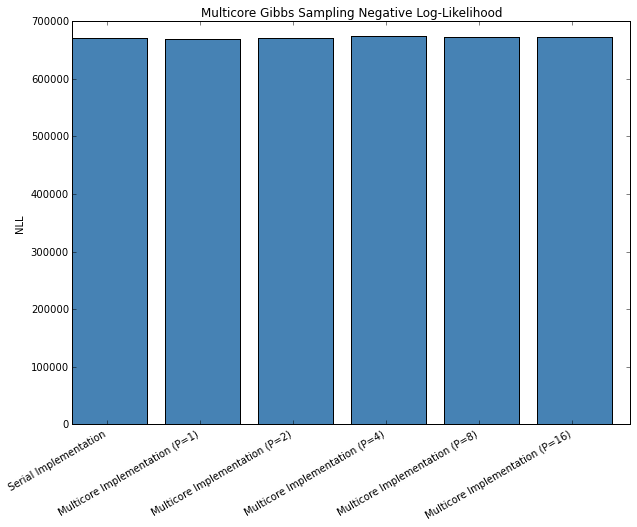

In [8]:
x, y = map(list, zip(*likelihoods.items()))
x[0] = 'Serial Implementation'
x[1:] = map(lambda p: 'Multicore Implementation (P=%d)' % p, x[1:])
y = map(abs, y)

fig = plt.figure()
width = .75
ind = np.arange(len(y))
plt.bar(ind, y, color='steelblue')

plt.xticks(ind + width / 2, x)
plt.title('Multicore Gibbs Sampling Negative Log-Likelihood')
plt.ylabel('NLL')
fig.autofmt_xdate()
fig.set_size_inches(10, 8)

plt.show()

In [9]:
for p, t in times.items():
    print p, abs(t), likelihoods[p]

0 3.11265119076 -670618.032748
1 9.03723809719 -669490.286952
2 4.68452664375 -671555.486272
4 2.73025445461 -673649.84545
8 2.54352185249 -672286.066953
16 2.7930745554 -673075.928622
